## Klassisk mekanikk numerisk øving 2
Eirik Jaccheri Høydalsvik, Hans Gløckner Giil

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#some constants
t0 = 0
g = 9.81
l, m = 1, 1
F_d = 0.2
omega = np.sqrt(g / l) #NB; we will use omega as a helping constant, and thetaDot as the time-derivative of the angle

theta0 = 0.2
thetaDot0 = 0
u0 = np.array((theta0, thetaDot0))

#RK4, solves differential equation f. here: u0 = [theta, theta_dot]
def kutta_4(f, u0, t0, tNum, dt, q, F_d, omega_d):
    U = np.zeros( ((tNum),  u0.size) )
    U[0] = u0
    for i in range(1 ,tNum):
        F1 = f(i * dt, U[i-1], q, F_d, omega_d)
        F2 = f(i * dt + dt / 2, U[i-1] + dt  / 2 * F1, q, F_d, omega_d)
        F3 = f(i * dt + dt / 2, U[i-1] + dt / 2 * F2, q, F_d, omega_d)
        F4 = f(i * dt + dt, U[i-1] + dt * F3, q, F_d, omega_d)
        U[i] = U[i-1] + dt / 6 * (F1 + 2* F2 + 2 * F3 + F4)        
    return U

def f_driven (t, u, q, F_d , omega_d):#with driving force F(t) / m / l = D_d * sin(omega_d* t) 
    return np.array([u[1], - omega**2 *u[0]- q * u[1]  + F_d * np.sin(omega_d * t)])


def energy(u_arr): #Y is array containing vectors with theta, thetaDot at different times
    return pot(u_arr) + kin(u_arr)

def pot(u_arr):
    return  m * g * l * u_arr.T[0]**2 / 2

def kin(u_arr):
    return 0.5 * m * ( l * u_arr.T[1])**2

def work(u_arr): #difference between starting energy and energy at different times
    return energy(u_arr)[0] - energy(u_arr)

In [4]:
#plot function for plotting theta(t)
def plot_theta(u0, t0, tNum, dt, q, plot_work, F_d = 0, omega_d = 0):
    fig, (ax1) = plt.subplots(1,1)
    #fig.set_size_inches(10, 8)
    t_arr = np.linspace(t0, t0 + dt * tNum, tNum)
    
    ax1.set_title("RK4, q =  " + str(q) , fontsize = 18)
    ax1.set_xlabel("Time", fontsize = 18)
    ax1.set_ylabel("Angle", fontsize = 18)
    #ax1.set(ylim = (-0.25, 0.25))
    u_arr = kutta_4(f_driven, u0, t0, tNum,  dt, q, F_d, omega_d)#array of [theta, theta_dot] values
    l1, = ax1.plot(t_arr, u_arr.T[0]) #UK.T gives [theta0, theta1 .... theta_tNum]
    if plot_work:
        #Bruker _tw for twin-axis
        ax1_tw = ax1.twinx()
        l1_tw, = ax1_tw.plot(t_arr, work(u_arr), color = "tab:red" ) #Replace energy with work to get work done by friction
        ax1_tw.set(ylim = (-1, 1))
        ax1_tw.set_ylabel("Work / J", fontsize = 18)
        ax1.legend((l1, l1_tw), ("Angle", "Friction work"), loc = "upper left", fontsize = 18)

    plt.tight_layout()
    return u_arr

def plot_theta_comparison(u0, t0, tNum, dt, omega_d_arr,q, F_d = 0 ):
    num = len(omega_d_arr)
    fig, ax = plt.subplots()
    #fig.set_size_inches(10, 8)
    t_arr = np.linspace(t0, t0 + dt * tNum, tNum)
    
    fig.suptitle("FIgure 5", y = 0)
    ax.set_xlabel("Time", fontsize = 18)
    ax.set_ylabel("Angle", fontsize = 18)
    fig.set_size_inches(12,8)
    for omega_d in omega_d_arr:
        u_arr = kutta_4(f_driven, u0, t0, tNum,  dt, q, F_d, omega_d)#array of [theta, theta_dot] values
        l1, = ax.plot(t_arr, u_arr.T[0], label = "$\omega_D$ = " + str(round(omega_d, 2))) #UK.T gives [theta0, theta1 .... theta_tNum]
    ax.legend(fontsize = 16)
    plt.show()
        

In [5]:
def under(t,q,theta0,theta_dot):
    phi = np.arctan(np.sqrt(omega**2 - q**2/4)/ (theta_dot / theta0 + (q / 2)))
    A = theta0 / np.sin(phi)
    return A * np.exp(-q * t / 2) * np.sin(np.sqrt(omega**2 - q**2 / 4)*t + phi)

def critical(t,q,theta0,theta_dot):
    return (theta0 * (1 + q/2 * t) + theta_dot) * np.exp(-q * t / 2)

def over(t,q,theta0,theta_dot):
    lam_p, lam_m = -q/2 + np.sqrt(q**2/4 - omega**2), -q/2 - np.sqrt(q**2/4 - omega**2)
    A = (theta_dot / theta0 - lam_m) / (lam_p - lam_m)
    B = (theta_dot / theta0 - lam_p) / (lam_m - lam_p)
    return theta0 * (A * np.exp(lam_p * t) + B * np.exp(lam_m * t))

def forced(f,t,q,omega_d,F_d):
    A = F_d * (omega**2 - omega_d**2) / ((omega**2 - omega**2)**2 - (q * omega_d)**2)
    B = F_d * q * omega_d / ((omega**2 - omega_d**2)**2 - (q*omega_d)**2)
    return A * np.sin(omega_d * t) + B * np.cos(omega_d * t) + f(t,q,theta0 - B, -omega_d*A)


## Exercise 1 - Damped harmonic motion of pendulum
Figur xxxx viser de 3 tilfellene for theta0 = xx, theta_dot0 = xx, bla bla. Figur yy viser analytisk løsning.

 Critical q value:  6.26418390534633


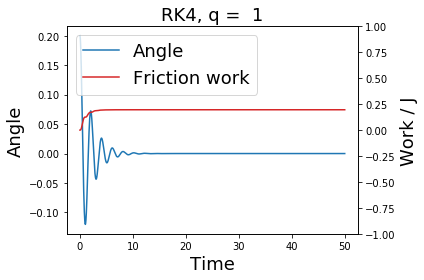

In [6]:
#bruk plot_theta til å plotte for 3 tilfeller : q <  2 * sqrt( g /l) (underdamped) , q > .. (verdamped),
# q  .. (critically damped). q_crit printet nedenfor.  Finn analytisk løsning og plot denne

t_num1, dt1 = 10000, 0.005
print(" Critical q value: ", np.sqrt(4 * omega **2))
#for q in np.arange(1, 10, 1):
q = 1
#    print( "q: ", q)
u_arr = plot_theta(u0,t0,t_num1, dt1, q ,plot_work = True)


## Exercise 2 - Forced harmonic damped pendulum
Figure $5$ shows the motion of the forced and damped pendulum as a functon of time, for 3 different values of the driving frequency $\omega_D$. The amplitude is largest for the value $\omega_D = 3.1$, because this is the value that is closest to $\omega = \sqrt{g / L}$.
Figure $6$ shows the amplitude of the pendulum after some time, when the pendulum oscillates steadily, as a function of $\omega = \sqrt{g / l}$ . The largest amplitude happens when $ \omega_D = \omega$, in this case $\omega_D \approx 3.1$, the so called resonnance frequency. In figure XX+1 the amplitude from the analytic expression  $$
\theta_0 = \frac{F_D}{\sqrt{(\Omega^2 - \Omega_D^2)^2 + (q \Omega_D)^2} }
$$ is plotted agains values of $\omega_D$. This analytic solution is plotted for the same values of $q$ as the numerical solution. It is clear that the numerical expression is similar to the analytical plot. We see that for increasing $q$, the curve grows smaller and the peak wider, in accordance with the analytic expression for $\theta_0$.


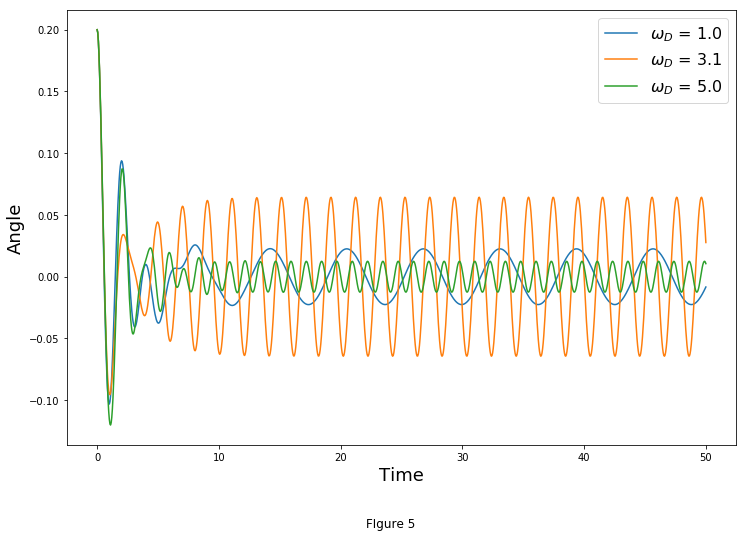

In [7]:
#plot for different omega_d-values
t_num2, dt2 = 1000, 0.05
F_d2, omega_d2 = 0.2, 3.1321
omega_d2_arr = np.array((1, 3.1, 5))
plot_theta_comparison(u0, t0, t_num2, dt2, omega_d2_arr, q,  F_d2)

In [8]:
#function that makes a bode-plot, showing amplitude of the final steady state solution as a function of omega_d
#does this for all values of q in q_arr. t_num : number of time steps, dt = length of time step. 
def bode_plot(t_num, dt,q_arr, omega_d_arr):    
    omega = np.sqrt(g / l)
    fig, (ax1, ax2) = plt.subplots(1,2) #ax1 = numerical, ax2 = analytic
    fig.set_size_inches(16, 8)
    fig.suptitle("Figure 6", y = 0)
    #numerical 
    ax1.set_title("Numerical solution")
    ax1.set(xlabel = "$\omega_D$")
    ax1.set(ylabel = "Amplitude")
    magnitude_arr = np.zeros(len(omega_d_arr))
    for q in q_arr:
        i = 0
        for omega_d in omega_d_arr:
            u_arr = kutta_4(f_driven, u0, t0, t_num,  dt, q, F_d, omega_d)[:, 0] #take only theta-values
            m = (np.amax(u_arr[- int(2 * np.pi / omega_d / dt):]))
            magnitude_arr[i] = m  
            i +=1
        l1, = ax1.plot(omega_d_arr, magnitude_arr, label = "q = " + str(round(q, 2)))
    #analytical
    for q in q_arr:
        l1, = ax2.plot(omega_d_arr, F_d / np.sqrt((omega**2 - omega_d_arr**2)**2 + (q * omega_d_arr)**2), label = "q = " + str(round(q, 2)))
    ax2.set_title("Analytical solution")
    ax2.set(xlabel = "$\omega_D$")
    ax2.set(ylabel = "Amplitude")
    plt.legend()
    plt.show()   

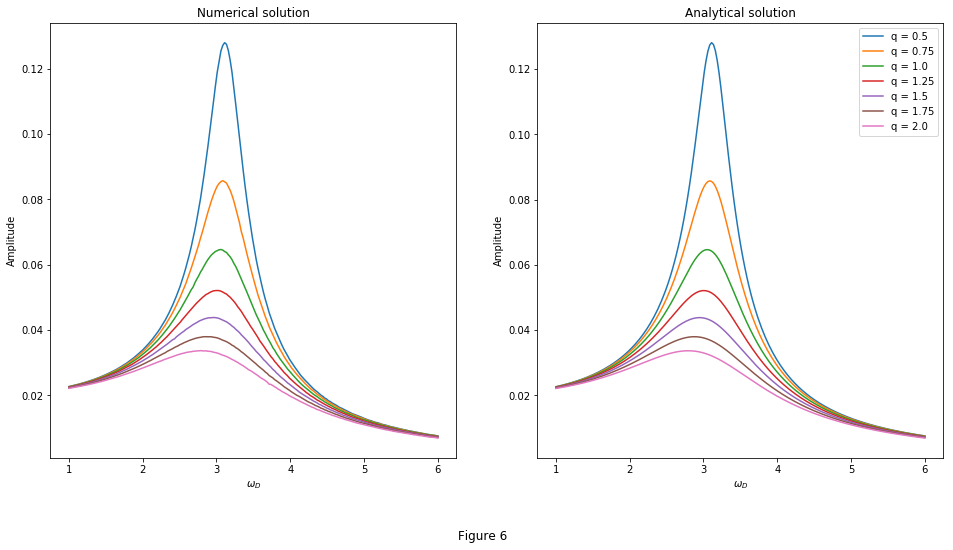

In [9]:
t_num3, dt3 = 1000, 0.05
omega_d_arr3, q_arr3 = np.linspace(1, 6, 1 * 200), np.linspace(0.5, 2, 7)                         
 
bode_plot(t_num3, dt3, q_arr3, omega_d_arr3)